# Laboratorio de regresión - 3

## Significancia de factores

|                |   |
:----------------|---|
| **Nombre**     | Ana Sofía Hinojosa Bale  |
| **Fecha**      | 24 de agosto 2025        |
| **Expediente** | 742594                   |

Descarga el archivo de publicidad y carga los datos (Advertising.csv).

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats
import statsmodels.api as sm

In [2]:
data = pd.read_csv("Advertising.csv")
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


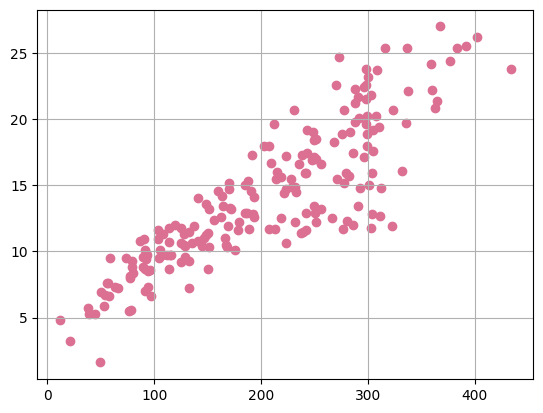

In [3]:
plt.scatter(data['TV']+ data['radio'] + data['newspaper'], data['sales'], color = "palevioletred")
plt.grid()

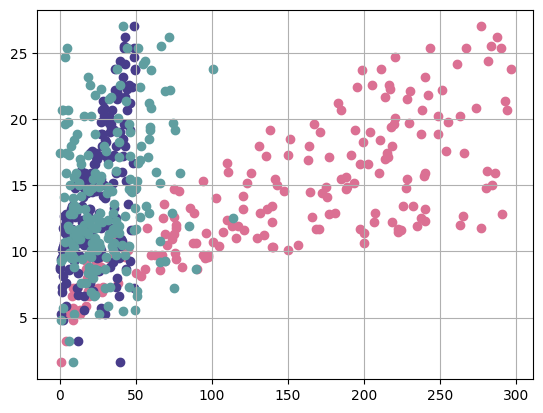

In [4]:
plt.scatter(data['TV'], data['sales'], color = "palevioletred")
plt.scatter(data['radio'], data['sales'], color = "darkslateblue")
plt.scatter(data['newspaper'], data['sales'], color = "cadetblue")
plt.grid()

**¿Hay alguna relación entre el presupuesto para publicidad y las ventas?**

Nuestra primera meta debe ser determinar si hay evidencia en los datos de que haya una asociación entre estas variables.

- ¿Por qué? ¿Qué resultaría si nos diéramos cuenta de la falta de relación entre el presupuesto de publicidad y las ventas?

**¿Qué tan fuerte es esta relación?**
Asumiendo que existe esta relación, ¿nos sirve conocer el impacto que tiene invertir en publicidad en las ventas?

**¿Cuáles medios están asociados con las ventas? ¿Qué tan grande es la asociación entre un medio específico y las ventas?**

Hay 3 medios distintos en los datos. ¿Sirve invertir en los 3? ¿Conviene más invertir sólo en uno?

**¿Qué tan seguros estamos de que podríamos predecir ventas futuras?**

**¿La relación es lineal?**

**¿Hay sinergia entre estos medios?**

Puede ser que gastar \\$50,000 en publicidad y otros \\$50,000 en radio es mejor opción que gastar \\$100,000 en televisión. A esto le llamamos efecto de interacción.

Podemos usar regresión lineal para responder todas estas preguntas.

Realiza una regresión lineal:

$$ \text{ventas} \approx \beta_0 + (\beta_1)(\text{TV})$$

In [5]:
lr = LinearRegression()
x = data['TV']
y= data['sales']

In [6]:
lr.fit(x.values.reshape(-1,1), y)
lr.intercept_, lr.coef_

(np.float64(7.0325935491276885), array([0.04753664]))

In [7]:
b0 = lr.intercept_
b1 = lr.coef_

$$\hat\beta_0 \approx 7$$
$$\hat\beta_1 \approx 0.0475$$

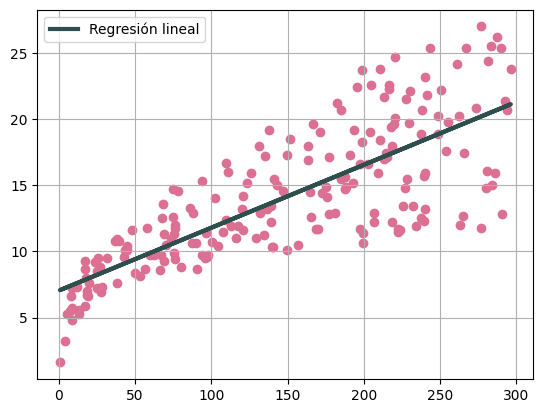

In [8]:
plt.scatter(data['TV'], data['sales'], color = "palevioletred")
plt.plot(x, lr.predict(x.values.reshape(-1,1)), color = "darkslategrey", label = "Regresión lineal", linewidth = 3)
plt.grid()
plt.legend()

### Verificando la precisión de nuestros coeficientes estimados

Recuerda que en el mundo real hay ruidos y errores de medición. Siempre se asume que la verdadera relación entre $X$ y $Y$ es $$Y = \beta_0 + \beta_1 X + \epsilon$$

Se asume que el término de error es independiente de $X$ (el error siempre es el mismo sin importar el valor de $X$). Este modelo describe a la *línea de regresión de la población*, que es la mejor aproximación de la verdadera relación entre $X$ y $Y$. Cuando usamos mínimos cuadrados encontramos la *línea de mínimos cuadrados*.

¿Cuál es la diferencia entre población y muestra?

¿Cuál crees que sea la diferencia entre hacer una regresión con todos los datos de la población y una muestra de ella?

La línea de regresión de la población no se puede observar. El concepto de comparar estas líneas es una extensión natural del acercamiento estadístico estándar de usar información de una muestra para estimar características de una población grande.

Imagina que quieres encontrar la altura promedio de un mexicano $\mu$. Medir a todos y cada uno de los mexicanos en situaciones similares, con la misma regla, mismo operador, y otras incontables formas de minimizar la variación de la medida es una tarea imposible. Lo que podemos asumir es que $\hat{\mu} = \bar{y}$. La media poblacional y la media muestral son diferentes, pero la media muestral es usualmente un buen estimado.

De la misma manera, como no contamos con el 100% de la información para hacer una regresión, los coeficientes $\beta_0$ y $\beta_1$ son desconocidos. Podemos estimarlos usando mínimos cuadrados, encontrando $\hat{\beta_0}$ y $\hat{\beta_1}$. Puede que las muestras que tengamos en ese momento estén un poco por encima de la media, pero otras muestras en otro momento puede que estén debajo de la media. En general, esperamos que el promedio de las aproximaciones $\hat{\mu}$ aproxime a $\mu$.

Esto lleva a la pregunta: ¿qué tan cercanos son nuestros coeficientes estimados a los verdaderos coeficientes? Utilizamos el concepto de error estándar para evaluar esto.

$$ \text{Var}(\hat{\mu})=\text{SE}(\hat{\mu})^2 = \frac{\sigma^2}{n} $$

Donde $\sigma$ es la desviación estándar de cada una de las observaciones $y_i$ de $Y$. El error estándar nos dice la cantidad promedio que el estimado difiere del valor verdadero. Podemos ver en la fórmula que entre más observaciones tengamos el error se hace más pequeño. Las fórmulas para errores estándar de $\hat{\beta_0}$ y $\hat{\beta_1}$ son:

$$ \text{SE}(\hat{\beta_0})^2 = \sigma^2 [\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n (x_i - \bar{x})^2}]$$

$$ \text{SE}(\hat{\beta_1})^2 = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

$$ \sigma^2 = \text{Var}(\epsilon) = \text{RSE}^2 = \frac{\text{RSS}}{n-p}$$

Para que estas fórmulas sean validas asumimos que los errores $\epsilon_i$ tienen varianza común $\sigma^2$ y que no están correlacionados.

Calcula los errores estándar de los coeficientes

In [9]:
y_pred = lr.predict(x.values.reshape(-1,1))
n = len(x)
x_mean = np.mean(x)
rss = np.sum((y_pred - y)**2)
var = rss/(n - 2)
se_b0 = np.sqrt(var * (1/n + (x_mean**2)/np.sum((x - x_mean)**2)))
se_b0


np.float64(0.4578429402734785)

In [10]:
se_b1 = np.sqrt(var / (np.sum((x - x_mean)**2)))
se_b1

np.float64(0.0026906071877968707)

Estos errores se pueden usar para calcular intervalos de confianza. Un intervalo de confianza del $95\%$ se define como un rango de valores en el cuál se encuentra el desconocido valor verdadero con un $95\%$ de probabilidad.

Otra forma de verlo es que si tomamos muestras repetidas y construimos un intervalo de confianza para cada una, el $95\%$ de los intervalos creados van a contener el valor verdadero. Para la regresión el intervalo de confianza del $95\%$ toma la forma:

$$ \hat{\beta_j} \pm 2\text{SE}(\hat{\beta_j})$$

Calcula los intervalos de confianza para los coeficientes estimados:

In [11]:
mas_b0 = b0 + 2*se_b0
menos_b0 = b0 - 2*se_b0
mas_b1 = b1 + 2*se_b1
menos_b1 = b1 - 2*se_b1

In [12]:
menos_b0, mas_b0

(np.float64(6.1169076685807315), np.float64(7.9482794296746455))

In [13]:
menos_b1, mas_b1

(array([0.04215543]), array([0.05291785]))

Los errores estándar también se usan para realizar pruebas de hipótesis. La prueba de hipótesis más común es probar la hipótesis nula de:

$$ H_0: \text{No hay relación entre } X \text{ y } Y \ \ \ \ (\beta_1=0)$$

contra la hipótesis alternativa:
$$ H_0: \text{Hay alguna relación entre } X \text{ y } Y \ \ \ (\beta_1 \neq 0)$$

Explica con tus palabras el significado de la hipótesis nula y la hipótesis alternativa.

Para probal la hipótesis nula debemos determinar si nuestro estimado $\hat{\beta_1}$ de $\beta_1$ está lo suficientemente alejado de cero para que podamos decir con confianza que este valor no es cero. 

¿Qué tan lejos? Depende de qué tanta confianza tengamos en el estimado encontrado. Si nuestro error estándar es pequeño y nuestro estimado está alejado de cero podríamos decir que hay muy poca probabilidad de que el valor verdadero sea 0. En cambio, si nuestro error estándar es grande y nuestro estimado está muy cerca de cero, entonces podrías ser que el valor verdadero sea cero y que no haya relación entre las variables.

Se calcula un *estadístico t* dado por
$$ t = \frac{\hat{\beta_j} - \mu}{\text{SE}(\hat{\beta_j})} $$

donde $\mu$ es el valor contra el que queremos probar.

Calcula el estadístico t para tus coeficientes estimados, usando como referencia la prueba de hipótesis.

In [14]:
t_b0 = b0 / se_b0
t_b1 = b1 / se_b1
t_b0, t_b1

(np.float64(15.360275174117534), array([17.6676256]))

La distribución t tiene forma de campana y se parece bastante a la distribución normal cuando $n > 30$. Ya sólo es cuestión de calcular la probabilidad de observar cualquier número tal que su valor absoluto sea igual o mayor que el valor absoluto del estadístico t calculado. En otras palabras:
$$ P(|x| \geq |t|) $$

A esta probabilidad la llamamos *p-value*. Un *p-value* pequeño indica que es poco probable que exista por puro azar una relación significativa entre predictor y respuesta, en caso de que no haya una asociación real entre predictor y respuesta. En otras palabras, el *p-value* te dice la probabilidad de que parezca que hay relación cuando no la hay.

Si el *p-value* es pequeño, inferimos que sí hay una asociación entre el predictor y la respuesta, y **rechazamos la hipótesis nula**.
  

¿Qué tan pequeño? Depende de la aplicación. Un valor muy común es del $5\%$.

Utiliza el siguiente código para calcular el *p-value* para tus coeficientes

`from scipy import stats`

`p_bj = 2*(1 - stats.t.cdf(np.abs(t_bj), n-p))`

In [15]:
p_b0 = 2*(1 - stats.t.cdf(np.abs(t_b0), n - 2))

In [16]:
p_b1 = 2*(1 - stats.t.cdf(np.abs(t_b1), n - 2))

In [17]:
p_b0, p_b1

(np.float64(0.0), array([0.]))

¿Se rechaza la hipótesis nula? ¿Qué significa?

## Función

In [68]:

def todo(x, y):
    nombre = x.name
    x = x.values.reshape(-1,1)
    lr = LinearRegression()
    lr.fit(x, y)
    b0 = lr.intercept_
    b1 = lr.coef_[0]
    y_pred = lr.predict(x.reshape(-1,1))
    n = len(x)
    x_mean = np.mean(x)
    rss = np.sum((y_pred - y)**2)
    var = rss/(n - 2)
    se_b0 = np.sqrt(var * (1/n + (x_mean**2)/np.sum((x - x_mean)**2)))
    se_b1 = np.sqrt(var / (np.sum((x - x_mean)**2)))
    mas_b0 = b0 + 2*se_b0
    menos_b0 = b0 - 2*se_b0
    mas_b1 = b1 + 2*se_b1
    menos_b1 = b1 - 2*se_b1
    t_b0 = b0 / se_b0
    t_b1 = b1 / se_b1
    p_b0 = 2*(1 - stats.t.cdf(np.abs(t_b0), n - 2))
    p_b1 = 2*(1 - stats.t.cdf(np.abs(t_b1), n - 2))
    return {
        "Regresión": nombre,
        "beta0": float(b0),
        "beta1": float(b1),
        "Error estándar beta0": float(se_b0),
        "Error estándar beta1": float(se_b1),
        "Intervalo de confianza beta0": (float(mas_b0), float(menos_b0)),
        "Intervalo de confianza beta1": (float(mas_b1), float(menos_b1)),
        "Estadístico t beta0": float(t_b0),
        "Estadístico t beta1": float(t_b1),
        "p-value beta0": float(p_b0),
        "p-value beta1": float(p_b1)
    }


Realiza otras dos regresiones. Ya tienes hecha la regresión de ventas dado el gasto en publicidad de TV. Realiza la regresión para gastos en radio y gastos en periódico. Organiza las respuestas para que debajo de esta celda se tenga:
- Título de regresión
- Coeficientes estimados
- Errores estándar de los coeficientes
- Intervalos de confianza
- Estadísticos t
- p-values
- Observaciones

In [52]:
todo(data['TV'], data['sales'])

{'Regresión': 'TV',
 'beta0': 7.0325935491276885,
 'beta1': 0.04753664043301979,
 'Error estándar beta0': 0.4578429402734785,
 'Error estándar beta1': 0.0026906071877968707,
 'Intervalo de confianza beta0': (7.9482794296746455, 6.1169076685807315),
 'Intervalo de confianza beta1': (0.05291785480861353, 0.04215542605742605),
 'Estadístico t beta0': 15.360275174117534,
 'Estadístico t beta1': 17.66762560087556,
 'p-value beta0': 0.0,
 'p-value beta1': 0.0}

In [42]:
todo(data['radio'], data['sales'])

{'Regresión': 'radio',
 'beta0': 9.311638095158285,
 'beta1': 0.20249578339243957,
 'Error estándar beta0': 0.5629004962718711,
 'Error estándar beta1': 0.020411306360090635,
 'Intervalo de confianza beta0': (10.437439087702028, 8.185837102614542),
 'Intervalo de confianza beta1': (0.24331839611262085, 0.16167317067225828),
 'Estadístico t beta0': 16.54224531125822,
 'Estadístico t beta1': 9.920765472824954,
 'p-value beta0': 0.0,
 'p-value beta1': 0.0}

In [43]:
todo(data['newspaper'], data['sales'])

{'Regresión': 'newspaper',
 'beta0': 12.35140706927816,
 'beta1': 0.05469309847227336,
 'Error estándar beta0': 0.6214201876094345,
 'Error estándar beta1': 0.016575721876358165,
 'Intervalo de confianza beta0': (13.594247444497029, 11.108566694059292),
 'Intervalo de confianza beta1': (0.08784454222498969, 0.021541654719557032),
 'Estadístico t beta0': 19.876095620248947,
 'Estadístico t beta1': 3.2995907436334186,
 'p-value beta0': 0.0,
 'p-value beta1': 0.0011481958688881466}

## Regresión lineal múltiple

En lugar de hacer una regresión para cada factor independiente, quizás se puede extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon $$

Para nuestro ejemplo de publicidad:

$$ \text{sales} = \beta_0 + \beta_1 (\text{TV}) + \beta_2 (\text{radio}) + \beta_3 (\text{newspaper}) + \epsilon $$

Utiliza la librería `statsmodels` para realizar la regresión. Por defecto la librería statsmodels no toma en cuenta el intercepto ($\beta_0$), por lo que se tendrá que agregar una columna de unos de tamaño *n* a la matriz X.

`import statsmodels.api as sm`

`ols = sm.OLS(Y, X)`

`results = ols.fit()`

`results.summary()`

In [76]:
ols = sm.OLS(data['sales'], sm.add_constant(data['TV']))
results = ols.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 25 Aug 2025   Prob (F-statistic):           1.47e-42
Time:                        20:25:46   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

¿Qué diferencias puedes observar entre los *p-values* de una regresión múltiple y los encontrados en las regresiones simples? ¿Por qué crees que existen estas diferencias?

In [77]:
ols = sm.OLS(data['sales'], sm.add_constant(data['radio']))
results = ols.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Mon, 25 Aug 2025   Prob (F-statistic):           4.35e-19
Time:                        20:26:08   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
ols = sm.OLS(data['sales'], sm.add_constant(data['newspaper']))
results = ols.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Mon, 25 Aug 2025   Prob (F-statistic):            0.00115
Time:                        20:26:20   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3514      0.621     19.876      0.000      11.126      13.577
newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3

## Addendum

Para calcular los *p-values* de los parámetros sin `statsmodels`:
1. Calcular RSS
2. Calcular RSE
3. `var_beta = np.linalg.inv(X.T @ X) * rse**2` (X con columna de intercepto)
4. `std_beta = np.sqrt(var_beta.diagonal())` El orden de los valores corresponde al orden de los factores en las columnas de la matriz $X$.
5. Calcular *estadístico t*
6. Calcular *p-value*